# Data Visualisations

In [1]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy as np

In [2]:
# load data in 

rona_df = pd.read_csv("covid.csv")

In [3]:
rona_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## Visualisation ideas 

- Date range between symptoms and death 
- How many are intubated 
- How many are intubated x other factors 
- Affect of Obesity
- % of deaths for Immunosuppression
- Date range of inpatients - admissions
- Inpatient to outpatient comparison per week + line of total cases per week 

### Count of intubated 

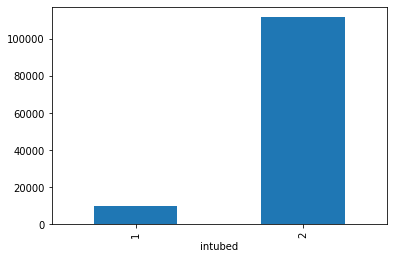

In [4]:
known_intubed = rona_df[rona_df.intubed < 97]
known_intubed.groupby('intubed').id.count().plot.bar(ylim=0)
plt.show()

### Intubation x Other Lung Factors


In [5]:
intubation_vs_other = rona_df[['id', 'intubed', 'pneumonia','copd','asthma','tobacco']]
intubation_vs_other.head()

,id,intubed,pneumonia,copd,asthma,tobacco
0,16169f,97,2,2,2,2
1,1009bf,97,2,2,2,2
2,167386,2,2,2,2,2
3,0b5948,2,1,2,2,2
4,0d01b5,2,2,2,2,2


In [6]:
intubation_vs_other = intubation_vs_other.replace([97, 98,99], np.nan)
intubation_vs_other = intubation_vs_other.dropna(axis=0)

In [7]:
intubation_vs_other.head()

# Want t

,id,intubed,pneumonia,copd,asthma,tobacco
2,167386,2.0,2.0,2.0,2.0,2.0
3,0b5948,2.0,1.0,2.0,2.0,2.0
4,0d01b5,2.0,2.0,2.0,2.0,2.0
5,1beec8,2.0,1.0,2.0,2.0,2.0
6,1.75E+56,2.0,2.0,2.0,2.0,2.0


In [8]:
intubed_true = intubation_vs_other.loc[intubation_vs_other['intubed'] == 1]
intubed_false = intubation_vs_other.loc[intubation_vs_other['intubed'] == 2]

In [9]:
intubed_true.head()


,id,intubed,pneumonia,copd,asthma,tobacco
9,006b91,1.0,1.0,2.0,2.0,2.0
50,03f45a,1.0,1.0,2.0,2.0,1.0
79,1d5df2,1.0,1.0,2.0,2.0,2.0
92,077c96,1.0,1.0,2.0,2.0,2.0
97,03877c,1.0,1.0,2.0,2.0,2.0


In [51]:
no_factors_intubated=sum((intubed_true['pneumonia'] == 2) &(intubed_true['copd']==2)&(intubed_true['asthma'] == 2)&(intubed_true['tobacco'] == 2))
no_factors_not_intubated=sum((intubed_false['pneumonia'] == 2) &(intubed_false['copd']==2)&(intubed_false['asthma'] == 2)&(intubed_false['tobacco'] == 2))

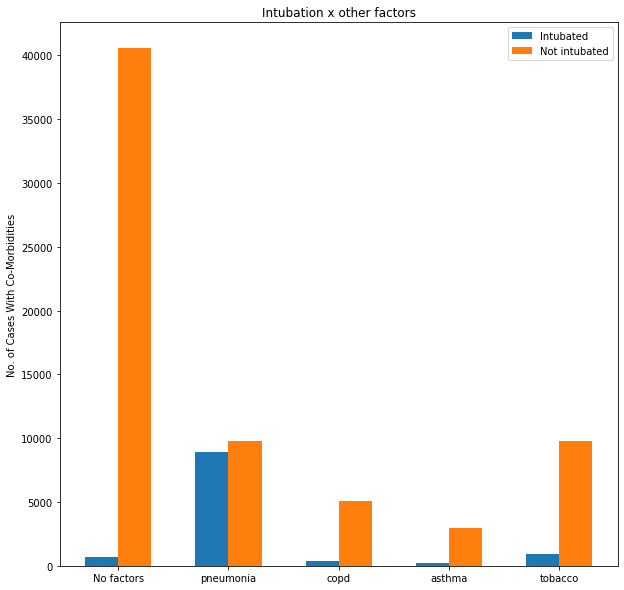

In [70]:

intubed_yes_2 = [no_factors_intubated,
                sum(intubed_true['pneumonia'] == 1),
                sum(intubed_true['copd'] == 1),
                sum(intubed_true['asthma'] == 1),
                sum(intubed_true['tobacco'] == 1)]
intubed_no_2 = [no_factors_not_intubated,
                sum(intubed_false['tobacco'] == 1),
                sum(intubed_false['copd'] == 1),
                sum(intubed_false['asthma'] == 1),
                sum(intubed_false['tobacco'] == 1)]
# Position of bars on x-axis
ind = np.arange(len(intubed_no_2))

# Figure size
plt.figure(figsize=(10,10))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, intubed_yes_2 , width, label='Intubated')
plt.bar(ind + width, intubed_no_2, width, label='Not intubated')

plt.ylabel('No. of Cases With Co-Morbidities')
plt.title('Intubation x other factors')

col_names = ['No factors','pneumonia','copd' ,'asthma' ,'tobacco']


plt.xticks(ind + width / 2, col_names)

plt.legend(loc='best')
plt.show()

In [68]:
col_names = ['No factors']
print(intubed_true.columns.values[2:])
col_names.append(intubed_true.columns.values[2:])
print(col_names)

['pneumonia' 'copd' 'asthma' 'tobacco']
['No factors', array(['pneumonia', 'copd', 'asthma', 'tobacco'], dtype=object)]


In [10]:
intubed_yes = [intubed_true['pneumonia'].to_numpy().sum(),
               intubed_true['copd'].to_numpy().sum(),
               intubed_true['asthma'].to_numpy().sum(),
               intubed_true['tobacco'].to_numpy().sum()]
intubed_no = [intubed_false['pneumonia'].to_numpy().sum(),
               intubed_false['copd'].to_numpy().sum(),
               intubed_false['asthma'].to_numpy().sum(),
               intubed_false['tobacco'].to_numpy().sum()]


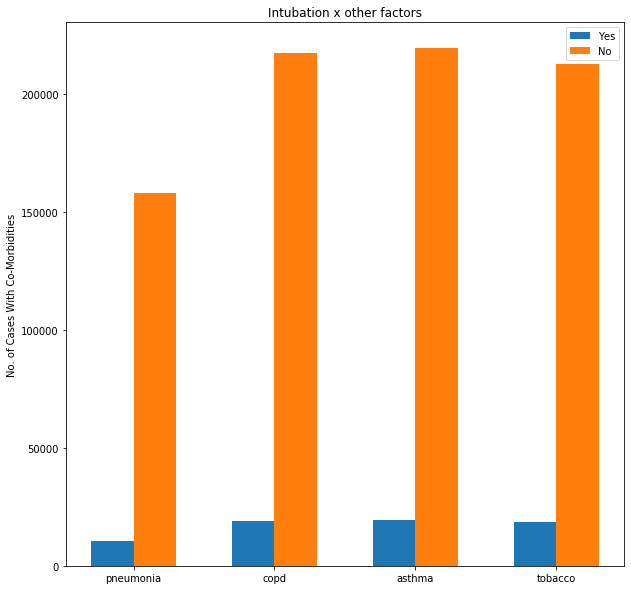

In [24]:
# Position of bars on x-axis
ind = np.arange(len(intubed_no))

# Figure size
plt.figure(figsize=(10,10))

# Width of a bar
width = 0.3

# Plotting
plt.bar(ind, intubed_yes , width, label='Yes')
plt.bar(ind + width, intubed_no, width, label='No')

plt.ylabel('No. of Cases With Co-Morbidities')
plt.title('Intubation x other factors')

col_names = intubed_true.columns.values[2:]

plt.xticks(ind + width / 2, col_names)

plt.legend(loc='best')
plt.show()

In [28]:
intubed_true['tobacco']

9         2.0
50        1.0
79        2.0
92        2.0
97        2.0
         ... 
566552    2.0
566573    2.0
566578    2.0
566590    2.0
566591    2.0
Name: tobacco, Length: 9753, dtype: float64

### Date Range between symptoms and death 

In [12]:
symptoms_death = rona_df[['date_symptoms', 'date_died']]

# drop 9999-99-99 - means no death
symptoms_death = symptoms_death[~symptoms_death['date_died'].str.contains("9999-99-99")]
#symptoms_death = symptoms_death.apply(pd.to_datetime)
symptoms_death['date_symptoms'] = pd.to_datetime(symptoms_death['date_symptoms'], format='%d-%m-%Y')
symptoms_death['date_died'] = pd.to_datetime(symptoms_death['date_died'], format='%d-%m-%Y')

# create a new column showing day difference 
symptoms_death['days_difference'] = (symptoms_death['date_died'] - symptoms_death['date_symptoms']).dt.days


In [13]:
symptoms_death.head()

,date_symptoms,date_died,days_difference
4,2020-04-13,2020-04-22,9
5,2020-04-16,2020-04-29,13
24,2020-05-06,2020-05-21,15
36,2020-04-27,2020-04-28,1
41,2020-04-23,2020-04-26,3


In [14]:
symptoms_death = symptoms_death[symptoms_death['days_difference'] >= 0]
symptoms_death.head()

,date_symptoms,date_died,days_difference
4,2020-04-13,2020-04-22,9
5,2020-04-16,2020-04-29,13
24,2020-05-06,2020-05-21,15
36,2020-04-27,2020-04-28,1
41,2020-04-23,2020-04-26,3


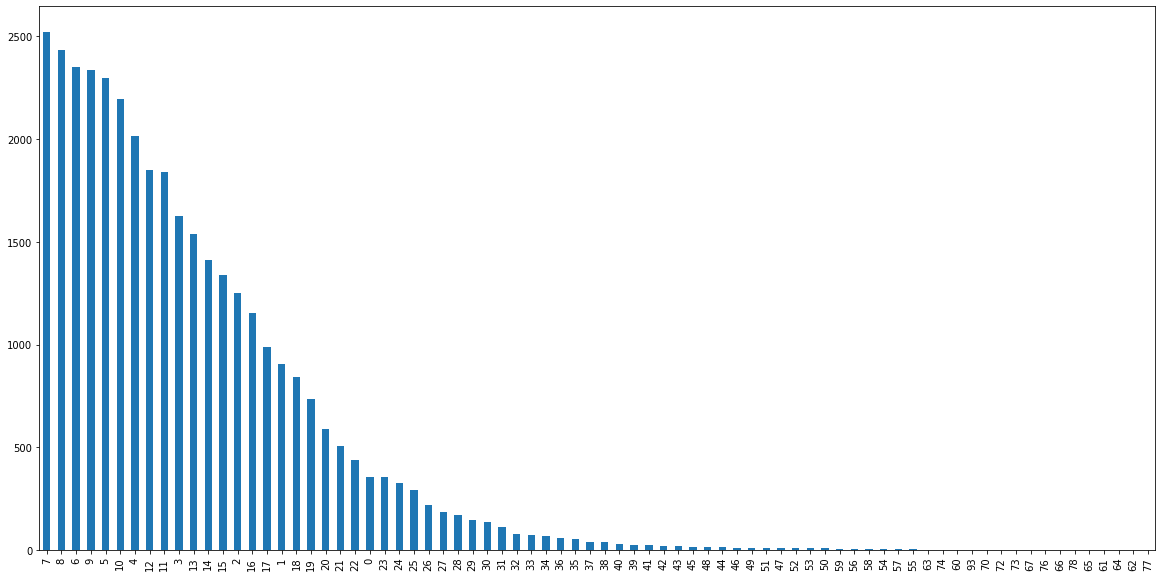

In [15]:
plt.figure(figsize=(20,10))
symptoms_death['days_difference'].value_counts().plot.bar(ylim=0)
plt.show()

### Obesity affecting Intubation

In [16]:
obesity_vs_intubed = rona_df[['id', 'intubed', 'obesity']]

In [17]:
obesity_vs_intubed.head()

,id,intubed,obesity
0,16169f,97,2
1,1009bf,97,2
2,167386,2,1
3,0b5948,2,2
4,0d01b5,2,2


In [18]:
# remove unknown intubed values
obesity_vs_intubed = obesity_vs_intubed.replace([97, 98,99], np.nan)
obesity_vs_intubed = obesity_vs_intubed.dropna(axis=0)

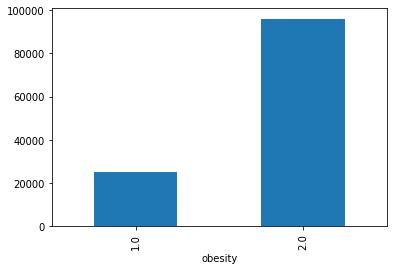

In [19]:
obesity_vs_intubed.groupby('obesity').intubed.count().plot.bar(ylim=0)
plt.show()

# number of those diagnosed with obesity that were intubed (1 - obesity diagnosed, 2 - not) ie not correlated

### Immunosupression

#### Affects on Intubed

In [20]:
immuno_intubed = rona_df[['id', 'intubed', 'inmsupr']]
# remove unknown intubed values
immuno_intubed = immuno_intubed.replace([97, 98,99], np.nan)
immuno_intubed = immuno_intubed.dropna(axis=0)

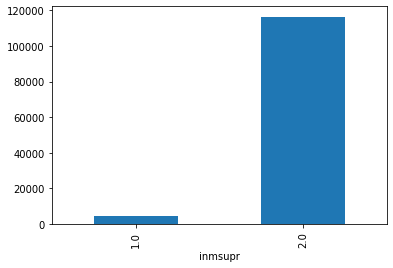

In [21]:
immuno_intubed.groupby('inmsupr').intubed.count().plot.bar(ylim=0)
plt.show()

# inmunosupression has little affect on intubation 

#### Deaths 

In [22]:
immuno_deaths = rona_df[['id', 'intubed', 'date_died']]
# remove unknown intubed values
immuno_deaths = immuno_deaths.replace([97, 98,99], np.nan)
immuno_deaths = immuno_deaths.dropna(axis=0)

# alter 9999-99-99 - means no death
immuno_deaths.date_died = np.where(immuno_deaths.date_died == '9999-99-99', 0, immuno_deaths.date_died)
immuno_deaths.date_died = np.where(immuno_deaths.date_died != 0, 1, immuno_deaths.date_died)

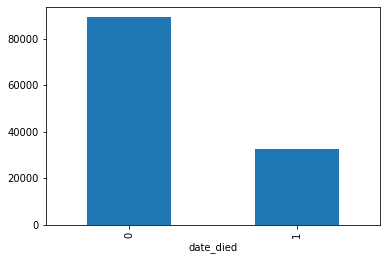

In [23]:
immuno_deaths.groupby('date_died').intubed.count().plot.bar(ylim=0)
plt.show()
